# Assignment 03: Rasters and Tables

For this assignment, you will be using Numpy, GDAL, and Pandas. Most of these questions  can be solved using methods shown in lecture. However, some cases will require you to search the internet for answers. This is intended because efficiently searching documentation or Stackoverflow is a requirement of modern programing. This assignment also requires you to obtain data (I will tell you where) and organize it correctly so that you can access is via relative paths (do not use absolute paths anywhere in this assignment).

To turn this in, create a PDF of your finished Jupyter notebook using Quarto (we will discuss this on Tuesday) and upload it to Canvas.


## Question 1

For this question, you will be using numpy to manipulate arrays in a way that works well for big data and will be using spatial tools to assess land-use change. Specifically, you will use data from a global, 300m resolution land-use, land-cover (LULC) map produced by ESACCI. They provide a wonderful time series of data from 1992-2019. If you want more information, check out their web viewer at https://maps.elie.ucl.ac.be/CCI/viewer/. Here you can view the data but also learn more about the classification regressions that uses time-series spectral data patterns to classify grid-cells into different types. I have extracted lulc maps for the country of Rwanda, which you will find in this assignment's data folder.

### Part a. 

Using the gdal package and the gdal.Open() function, open up the land-use, land-cover map for Rwanda in 2000. 

In this file, there is only 1 band in this file, so you can also access it with the GetRasterBand(1) function. Without reading the whole array, show how you can determine how many total grid-cells there are in this country.

In [1]:
# 1A Answer

from osgeo import gdal
import numpy as np
import os, random
import matplotlib.pyplot as plt

lulc_filename_00 = 'rwanda_lulc_2000.tif'

# the ../ notation means go up one level relative to your current working directory. This gets us outside of the course
# repository and into our Data directory
data_directory = '../data' 

# Join them together (this will work across operating systems)
lulc_file_path_00 = os.path.join(data_directory, lulc_filename_00)

print('lulc_file_path', lulc_file_path_00)

# Also check if the file exists
print("Does the file exist?", os.path.exists(lulc_file_path_00))

# Open dataset
lulc_dataset00 = gdal.Open(lulc_file_path_00)
print(lulc_dataset00)

lulc_dataset_band00 = lulc_dataset00.GetRasterBand(1)

lulc_file_path ../data\rwanda_lulc_2000.tif
Does the file exist? True
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002AF72883FC0> >


### Part b.

Using the results of part a, read the whole array into memory as a numpy array (the default option when using the ReadAsArray() funciton), and plot it using the matplotlib imshow command. Add a nice title to the plot describing what it is.

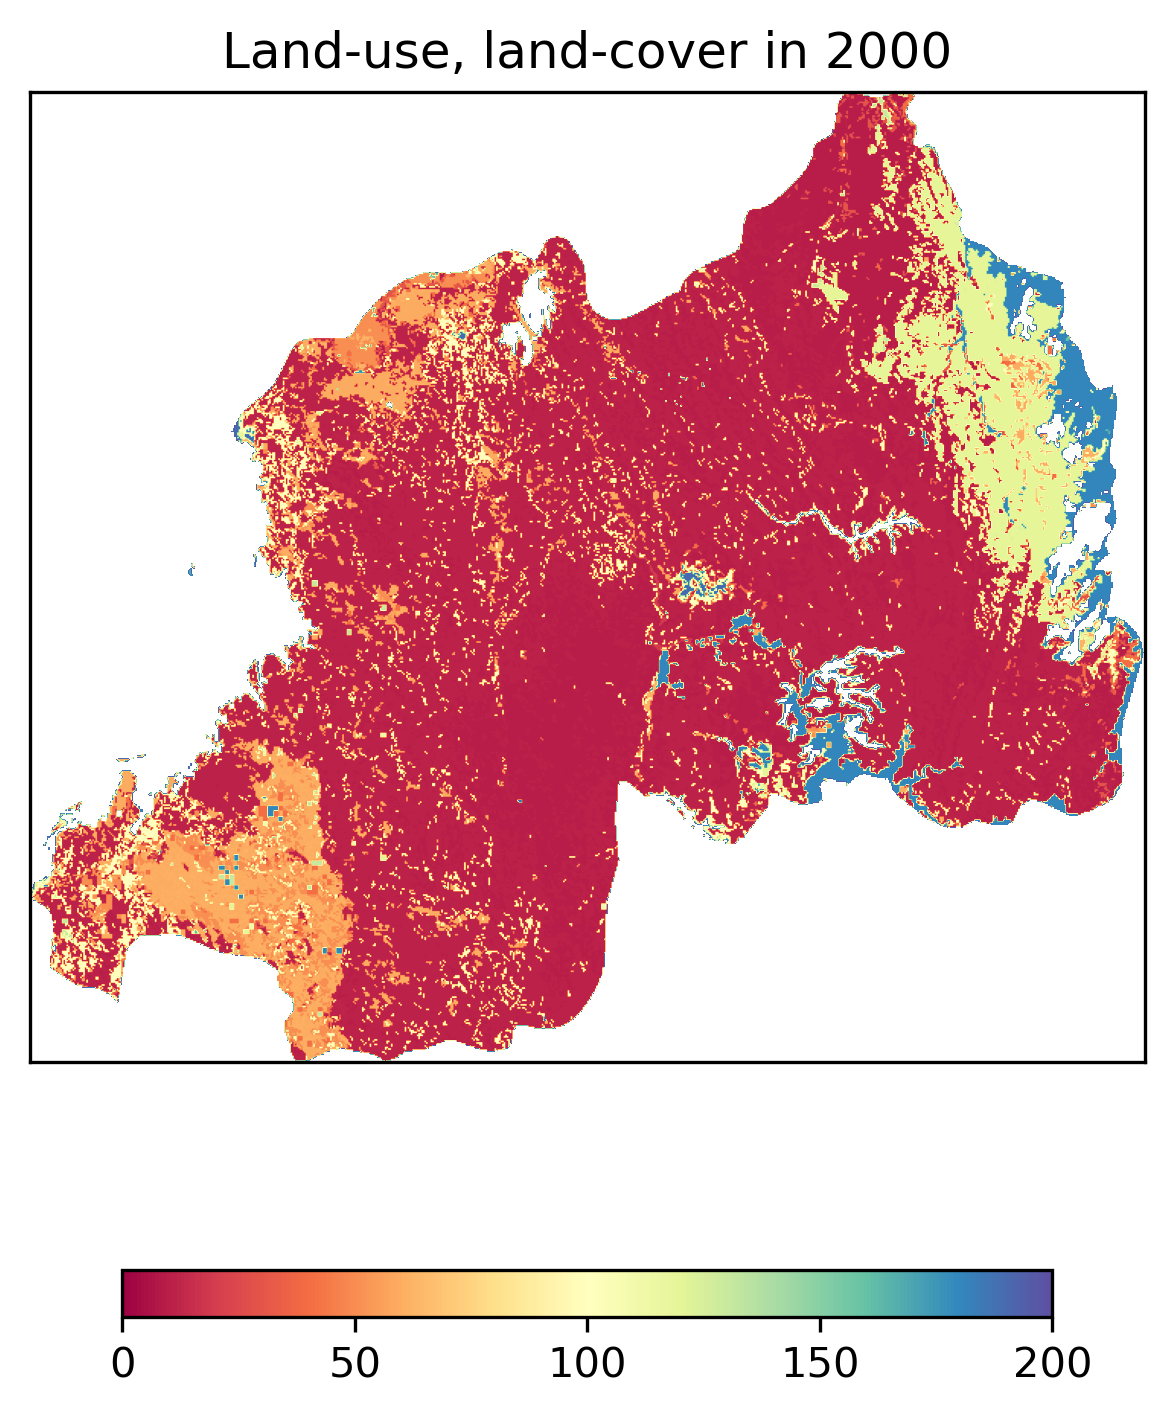

In [2]:
#1B Answer

array_00 = lulc_dataset_band00.ReadAsArray()
shape_00 = array_00.shape

import matplotlib.pyplot as plt

# The second (and often better) plotting method is to use plt to create a figure and one ore more axes.
# This is potentially confusing but is powerful. the Axes object we created (ax) is the plottable area (and there could be lots of axes)
# The figure contains all the axes and is responsible for organizing stuff.

fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Land-use, land-cover in 2000')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(array_00)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 200)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

### Part c.

Using the legend you find at https://maps.elie.ucl.ac.be/CCI/viewer/download/ESACCI-LC-QuickUserGuide-LC-Maps_v2-0-7.pdf reclassify the LULC into a simplified map where 1 = cropland (including any mosaic types that are partially cropland) and 0 = anything else. Plot this using imshow.

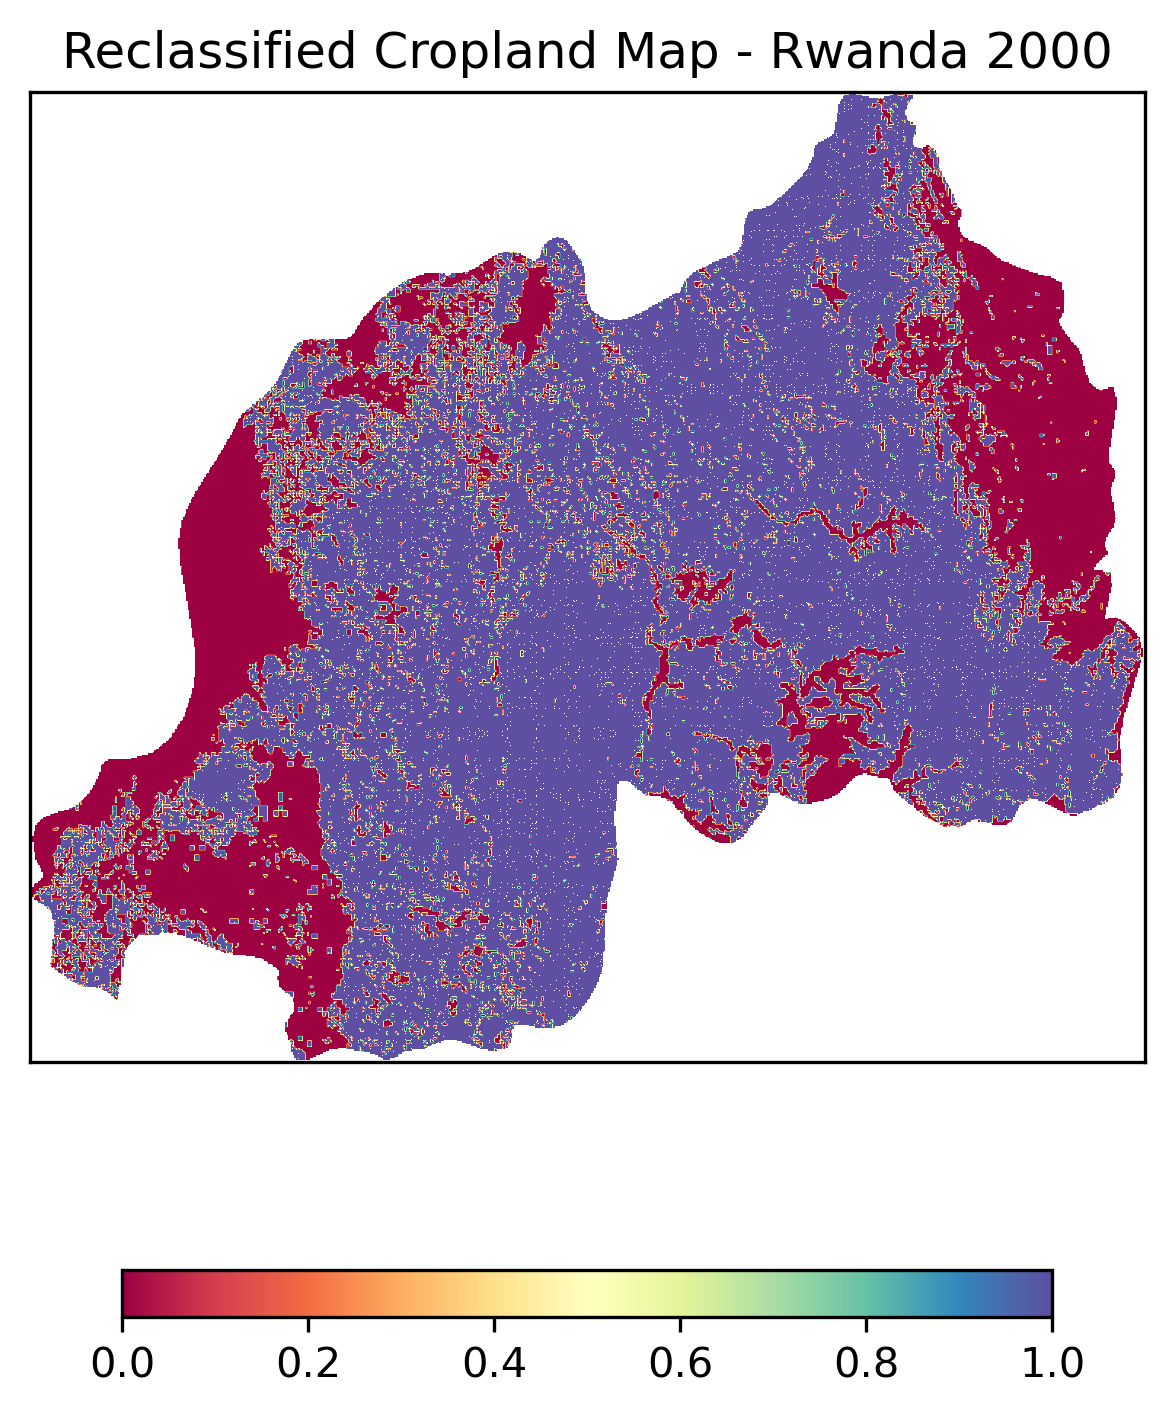

In [3]:
# 1C Answer

# I cannot open the website

# Reclassify the land cover array
cropland_array_00 = np.where((array_00 == 255), -1, 0)

cropland_array_00 = np.where(
    (array_00 == 10) |  # Cropland
    (array_00 == 11) |  # Mosaic Cropland
    (array_00 == 14) |  # Mosaic Vegetation/Cropland
    (array_00 == 30) |  # Rainfed Cropland
    (array_00 == 40),   # Irrigated Cropland
    1,  # Set 1 for cropland
    cropland_array_00   # Set 0 for anything else
)

cropland_array_00 = np.where((cropland_array_00 == -1), 255, cropland_array_00)

# Plot the reclassified array using matplotlib
fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Reclassified Cropland Map - Rwanda 2000')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(cropland_array_00)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 1)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

### Part d.

Repeat the process for the 2010 LULC map. Using this array with the one from part c, create a new array that records where there was cropland expansion (i.e., there is cropland in 2010 but not in 2000) and where there was cropland abandonment (cropland in 2000 but not in 2010). Save this classification in a single new array. Plot this last array. Optionally, add a legend indicating which values in the array denote expansion and abandonment using some variant of `ax.legend()'. 

In [4]:
# 2D Answer

lulc_filename_10 = 'rwanda_lulc_2010.tif'

# the ../ notation means go up one level relative to your current working directory. This gets us outside of the course
# repository and into our Data directory
data_directory = '../data' 

# Join them together (this will work across operating systems)
lulc_file_path_10 = os.path.join(data_directory, lulc_filename_10)

print('lulc_file_path', lulc_file_path_10)

# Also check if the file exists
print("Does the file exist?", os.path.exists(lulc_file_path_10))

# Open dataset
lulc_dataset10 = gdal.Open(lulc_file_path_10)
print(lulc_dataset10)

lulc_dataset_band10 = lulc_dataset10.GetRasterBand(1)

lulc_file_path ../data\rwanda_lulc_2010.tif
Does the file exist? True
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002AF75003FC0> >


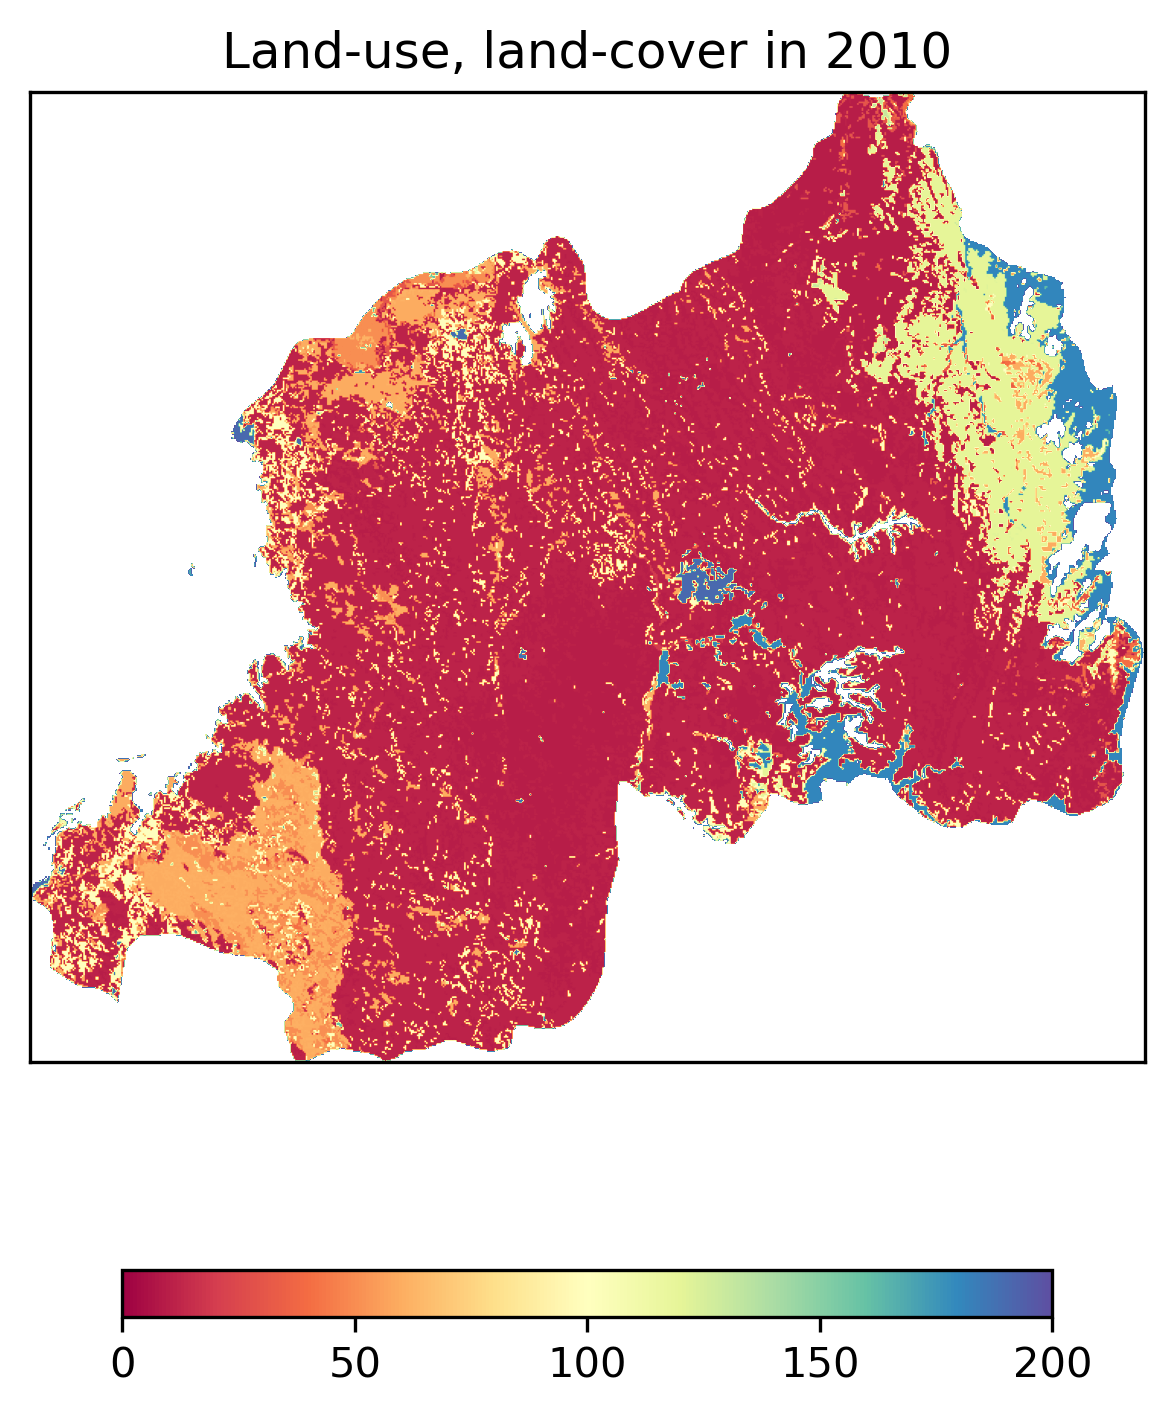

In [5]:
array_10 = lulc_dataset_band10.ReadAsArray()
shape_10 = array_10.shape

import matplotlib.pyplot as plt

# The second (and often better) plotting method is to use plt to create a figure and one ore more axes.
# This is potentially confusing but is powerful. the Axes object we created (ax) is the plottable area (and there could be lots of axes)
# The figure contains all the axes and is responsible for organizing stuff.

fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Land-use, land-cover in 2010')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(array_10)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 200)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

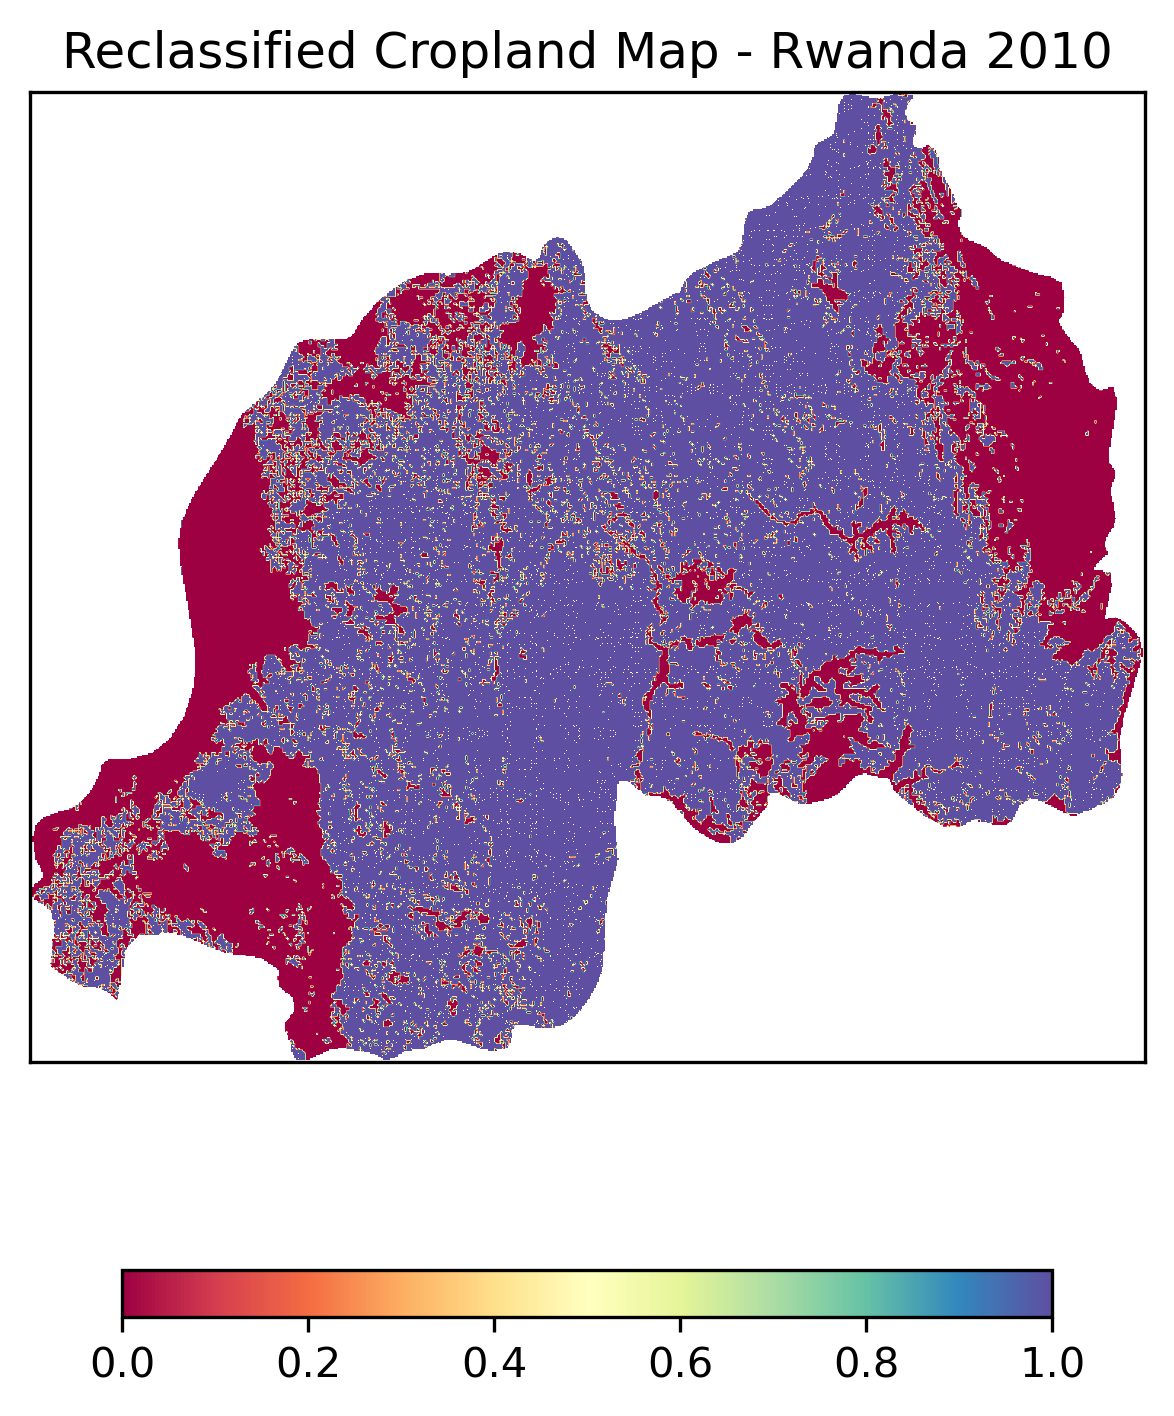

In [6]:
# Reclassify the land cover array
# Based on the legend, set 1 for cropland and 0 for anything else

cropland_array_10 = np.where((array_10 == 255), -1, 0)

cropland_array_10 = np.where(
    (array_10 == 10) |  # Cropland
    (array_10 == 11) |  # Mosaic Cropland
    (array_10 == 14) |  # Mosaic Vegetation/Cropland
    (array_10 == 30) |  # Rainfed Cropland
    (array_10 == 40),   # Irrigated Cropland
    1,  # Set 1 for cropland
    cropland_array_10  
)

cropland_array_10 = np.where((cropland_array_10 == -1), 255, cropland_array_10)

# Plot the reclassified array using matplotlib
fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Reclassified Cropland Map - Rwanda 2010')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(cropland_array_10)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 1)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)

# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

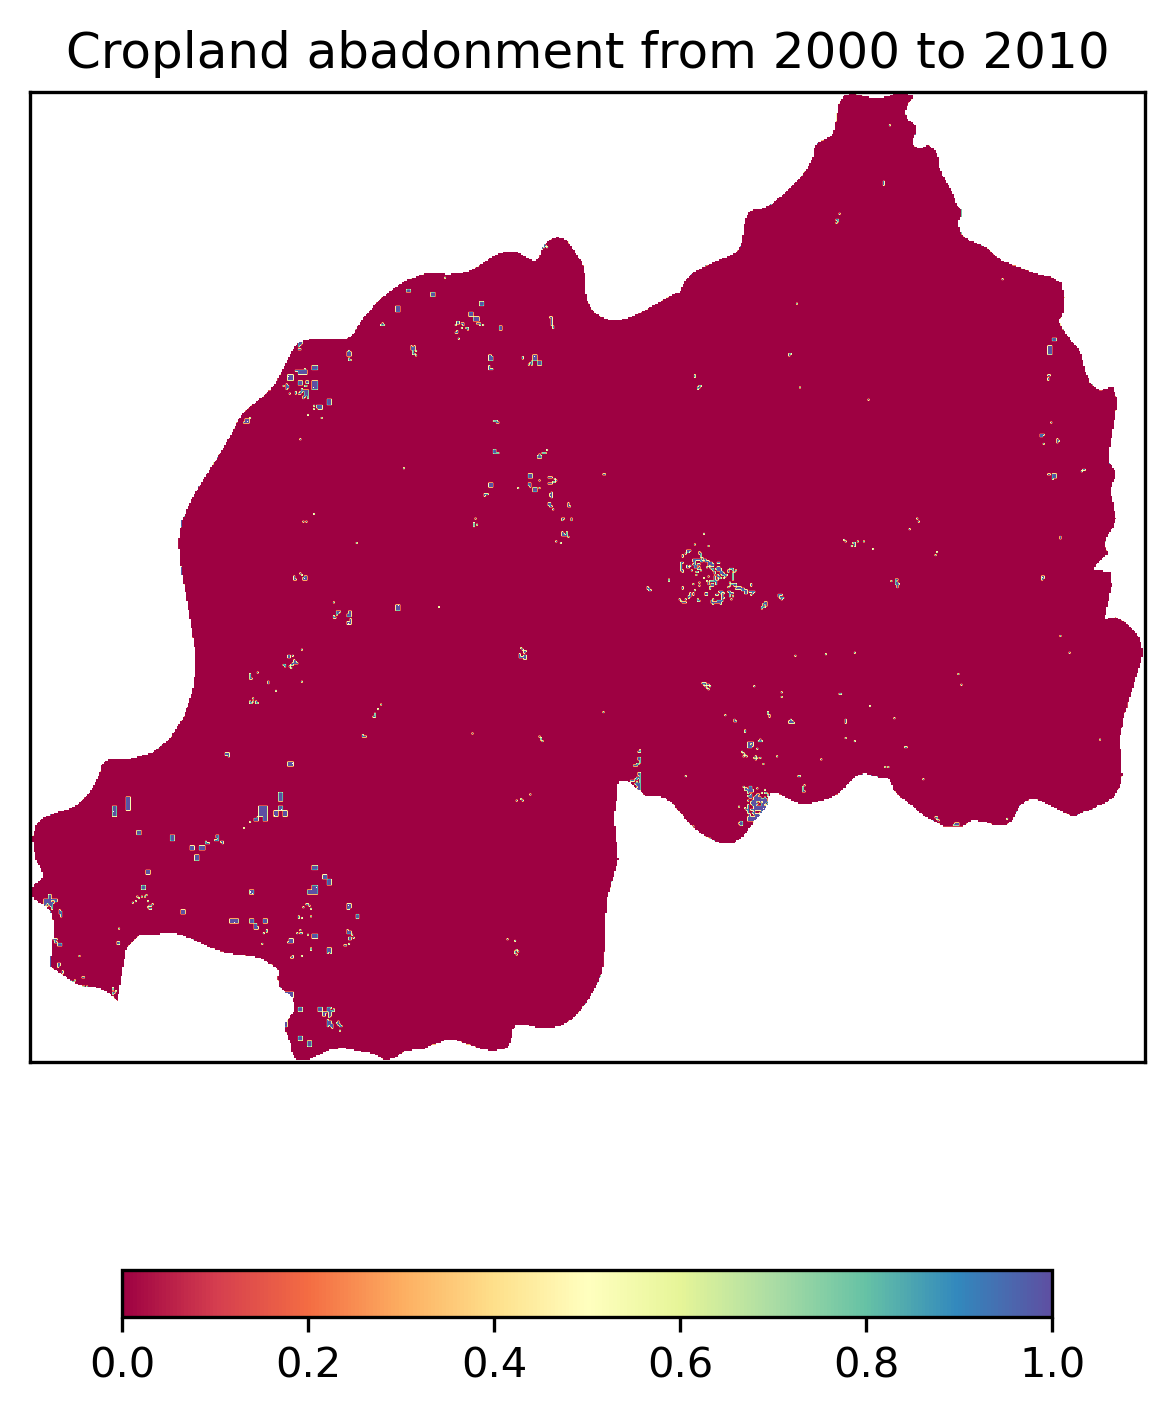

In [7]:
# Calculate cropland abandonment
cropland_abandonment_0010 = np.where((array_00 == 255), -1, 0)
cropland_abandonment_0010 = np.where((cropland_array_00 == 1) & (cropland_array_10 == 0), 1, cropland_abandonment_0010)
cropland_abandonment_0010 = np.where((cropland_abandonment_0010 == -1), 255, cropland_abandonment_0010)

# Plot the reclassified array using matplotlib
fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Cropland abadonment from 2000 to 2010')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(cropland_abandonment_0010)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 1)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)

# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

### Part e.

Repeat the all the steps in part d, but with the 2015 LULC map, calculating the difference between 2015 and 2010.

In [8]:
# 2E Answer
lulc_filename_15 = 'rwanda_lulc_2015.tif'

# the ../ notation means go up one level relative to your current working directory. This gets us outside of the course
# repository and into our Data directory
data_directory = '../data' 

# Join them together (this will work across operating systems)
lulc_file_path_15 = os.path.join(data_directory, lulc_filename_15)

print('lulc_file_path', lulc_file_path_15)

# Also check if the file exists
print("Does the file exist?", os.path.exists(lulc_file_path_15))

# Open dataset
lulc_dataset15 = gdal.Open(lulc_file_path_15)
print(lulc_dataset00)

lulc_dataset_band15 = lulc_dataset15.GetRasterBand(1)


lulc_file_path ../data\rwanda_lulc_2015.tif
Does the file exist? True
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002AF72883FC0> >


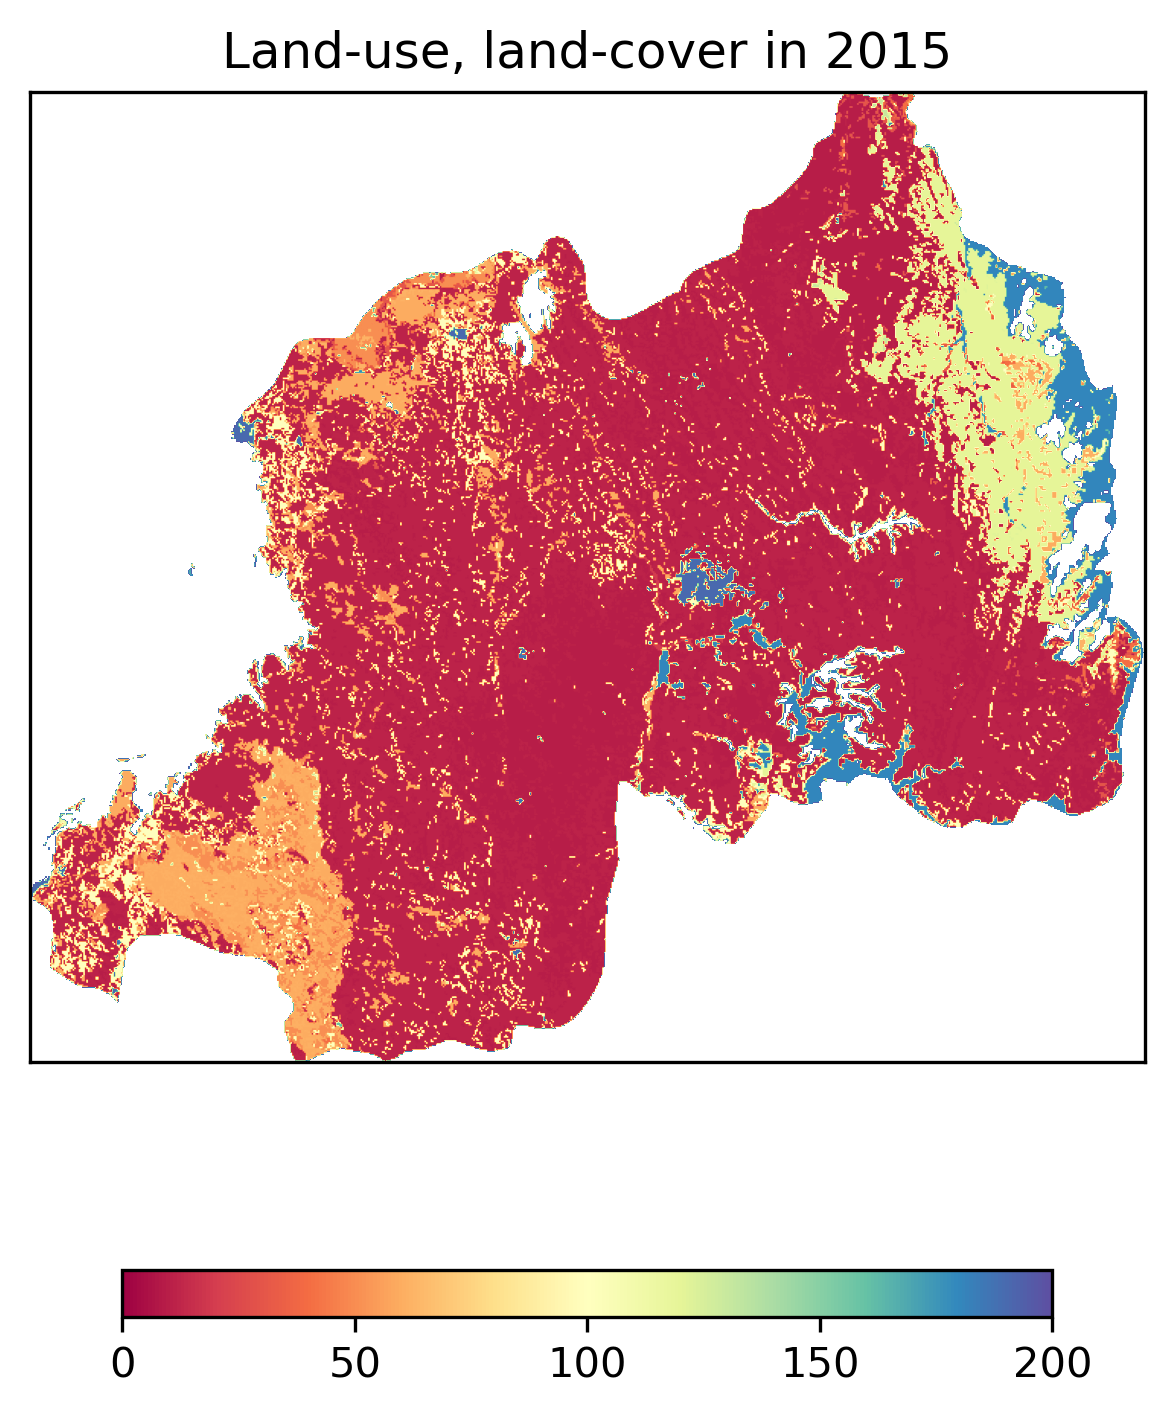

In [9]:
array_15 = lulc_dataset_band15.ReadAsArray()
shape_15 = array_15.shape

import matplotlib.pyplot as plt

# The second (and often better) plotting method is to use plt to create a figure and one ore more axes.
# This is potentially confusing but is powerful. the Axes object we created (ax) is the plottable area (and there could be lots of axes)
# The figure contains all the axes and is responsible for organizing stuff.

fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Land-use, land-cover in 2015')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(array_15)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 200)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()


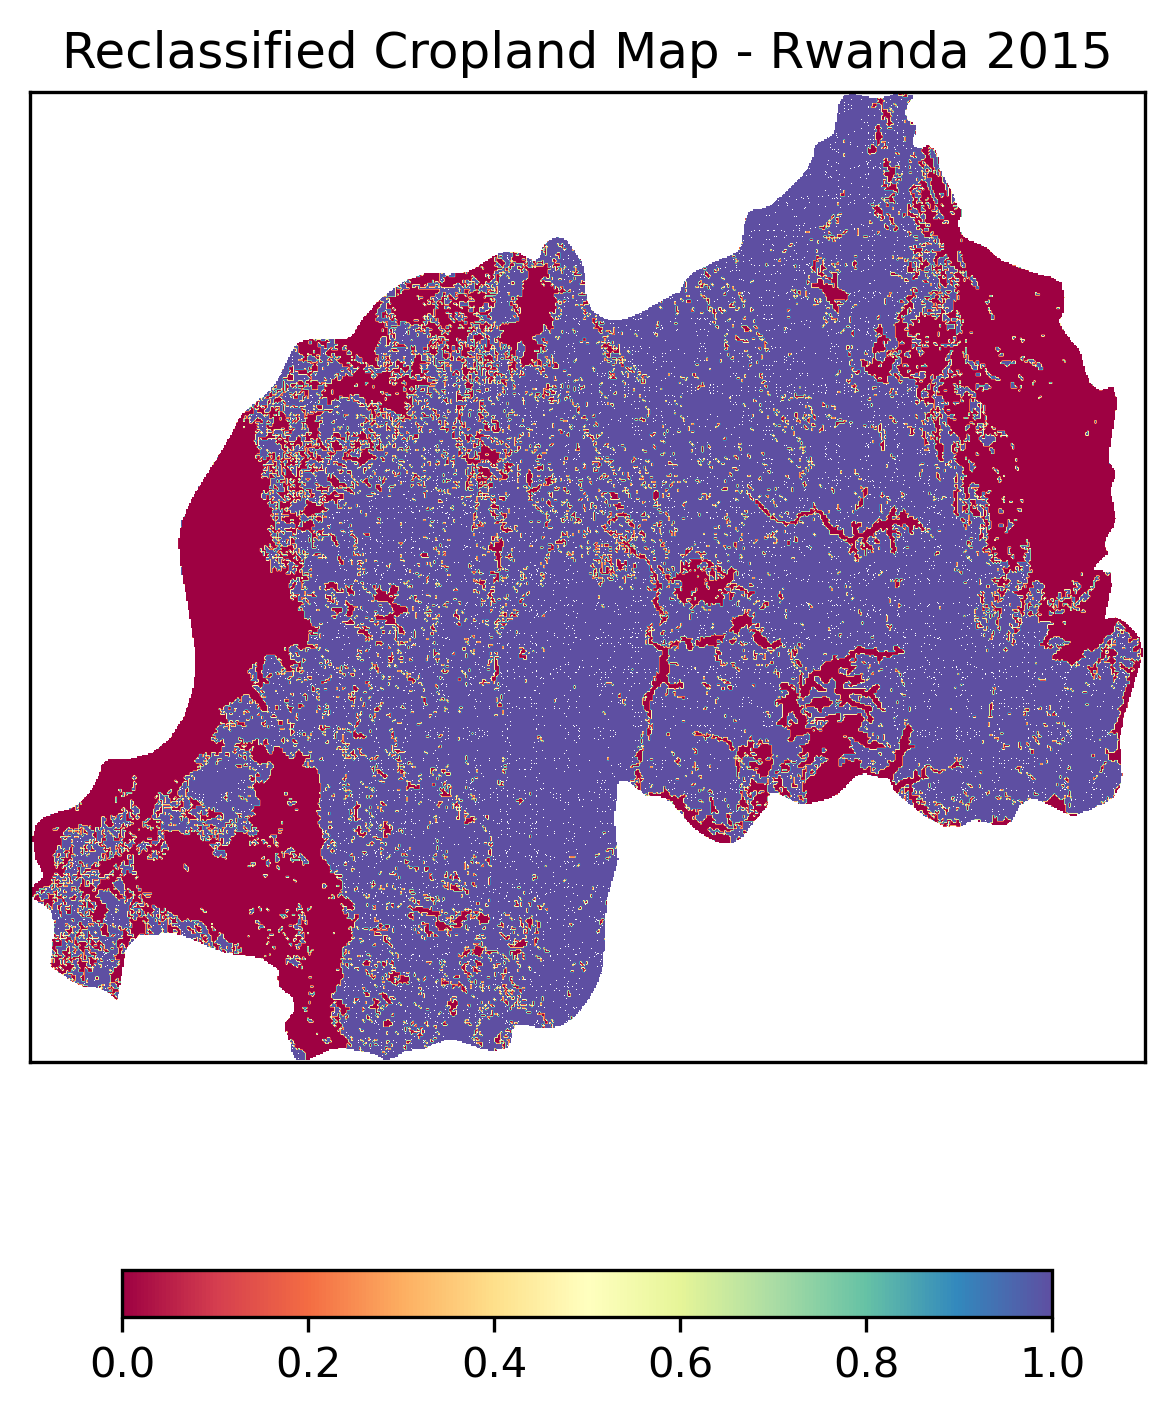

In [10]:
# Reclassify the land cover array
cropland_array_15 = np.where((array_15 == 255), -1, 0)

cropland_array_15 = np.where(
    (array_15 == 10) |  # Cropland
    (array_15 == 11) |  # Mosaic Cropland
    (array_15 == 14) |  # Mosaic Vegetation/Cropland
    (array_15 == 30) |  # Rainfed Cropland
    (array_15 == 40),   # Irrigated Cropland
    1,  # Set 1 for cropland
    cropland_array_15   # Set 0 for anything else
)

cropland_array_15 = np.where((cropland_array_15 == -1), 255, cropland_array_15)

# Plot the reclassified array using matplotlib
fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Reclassified Cropland Map - Rwanda 2015')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(cropland_array_15)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 1)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

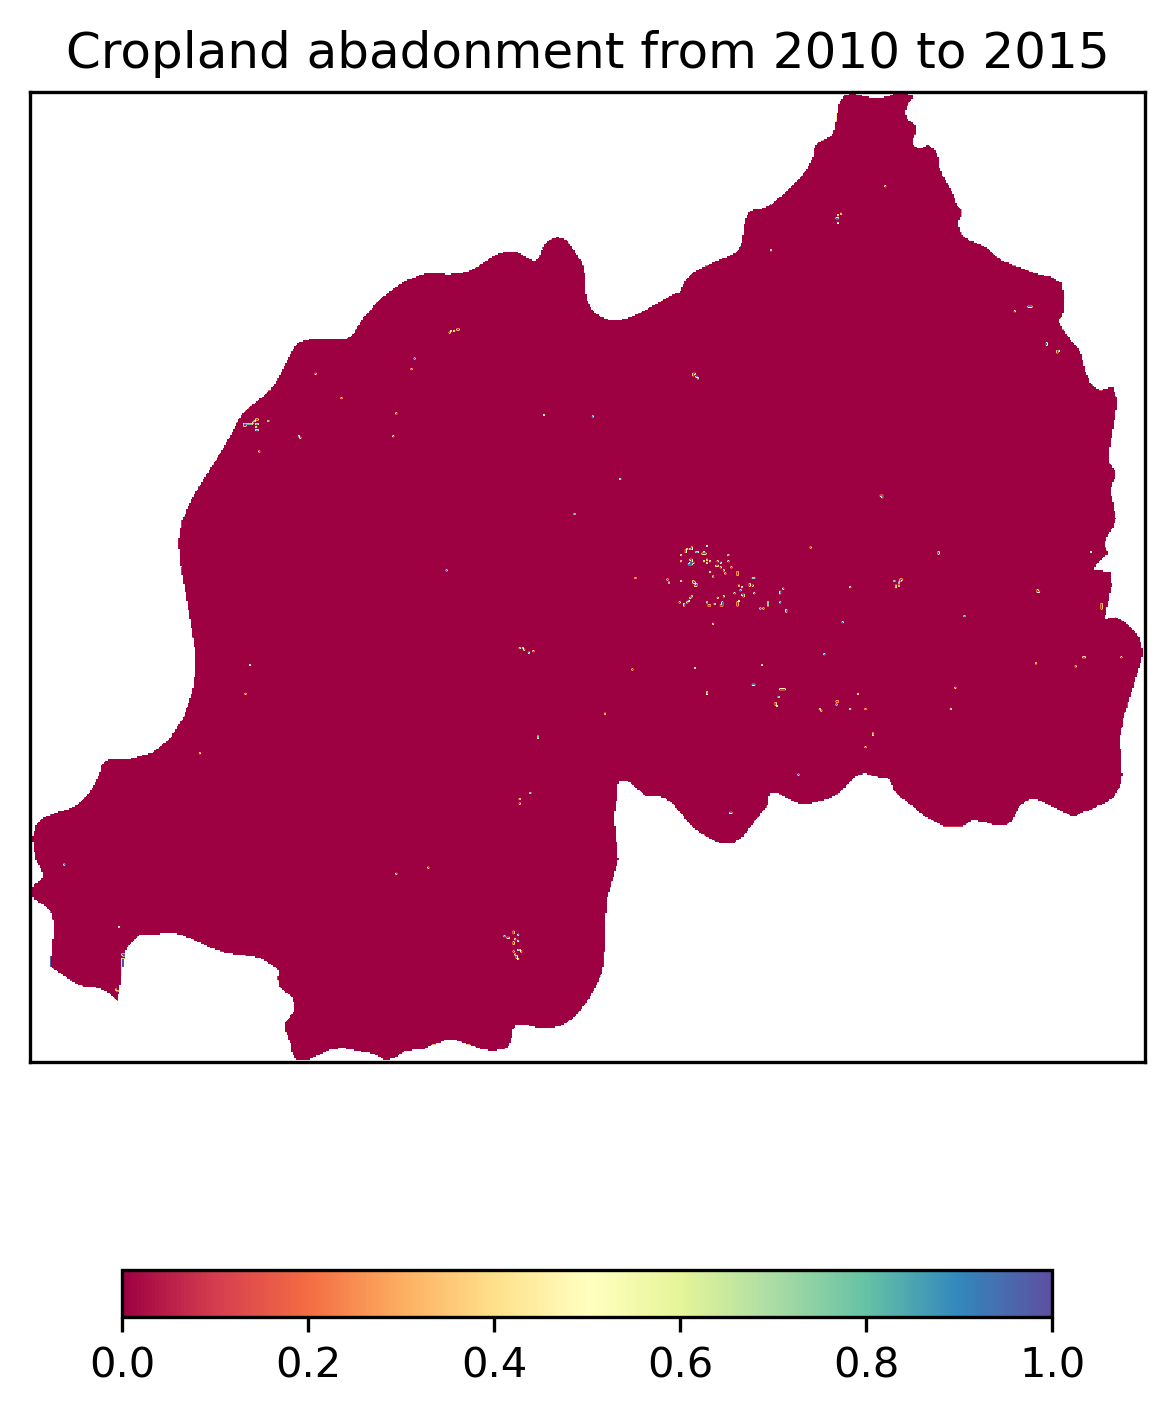

In [11]:
# Calculate cropland abandonment
cropland_abandonment_1015 = np.where((array_10 == 255), -1, 0)
cropland_abandonment_1015 = np.where((cropland_array_10 == 1) & (cropland_array_15 == 0), 1, cropland_abandonment_1015)
cropland_abandonment_1015 = np.where((cropland_abandonment_1015 == -1), 255, cropland_abandonment_1015)

# Plot the reclassified array using matplotlib
fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Cropland abadonment from 2010 to 2015')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(cropland_abandonment_1015)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 1)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
# Increase the dpi
fig.set_dpi(300)

# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

### Part f.

Use the two cropland binary rasters you processed above and make a new raster as follows:

0 = Never cropland
1 = Cropland in 2000 only
2 = Cropland in 2010 only
3 = Cropland in 2015 only
4 = Cropland in 2000 and 2010
5 = Cropland in 2000 and 2015
6 = Cropland in 2010 and 2015
7 = Cropland in 2000, 2010, and 2015

Plot this raster using imshow. Add a legend indicating what each value means.

A tip for you: when you are combining multiple logical statements in numpy, each individual logical statement must be surrounded by parentheses. Additionally, you have to use the bitwise logical operators & and | instead of the normal logical operators and and or (numpy requires this for specificity).

For example, np.where((a == 1) & (b == 2)) will return the indices where a is 1 and b is 2. If you do np.where(a == 1 & b == 2) or np.where((a == 1) and (b == 2)), you will get an error.

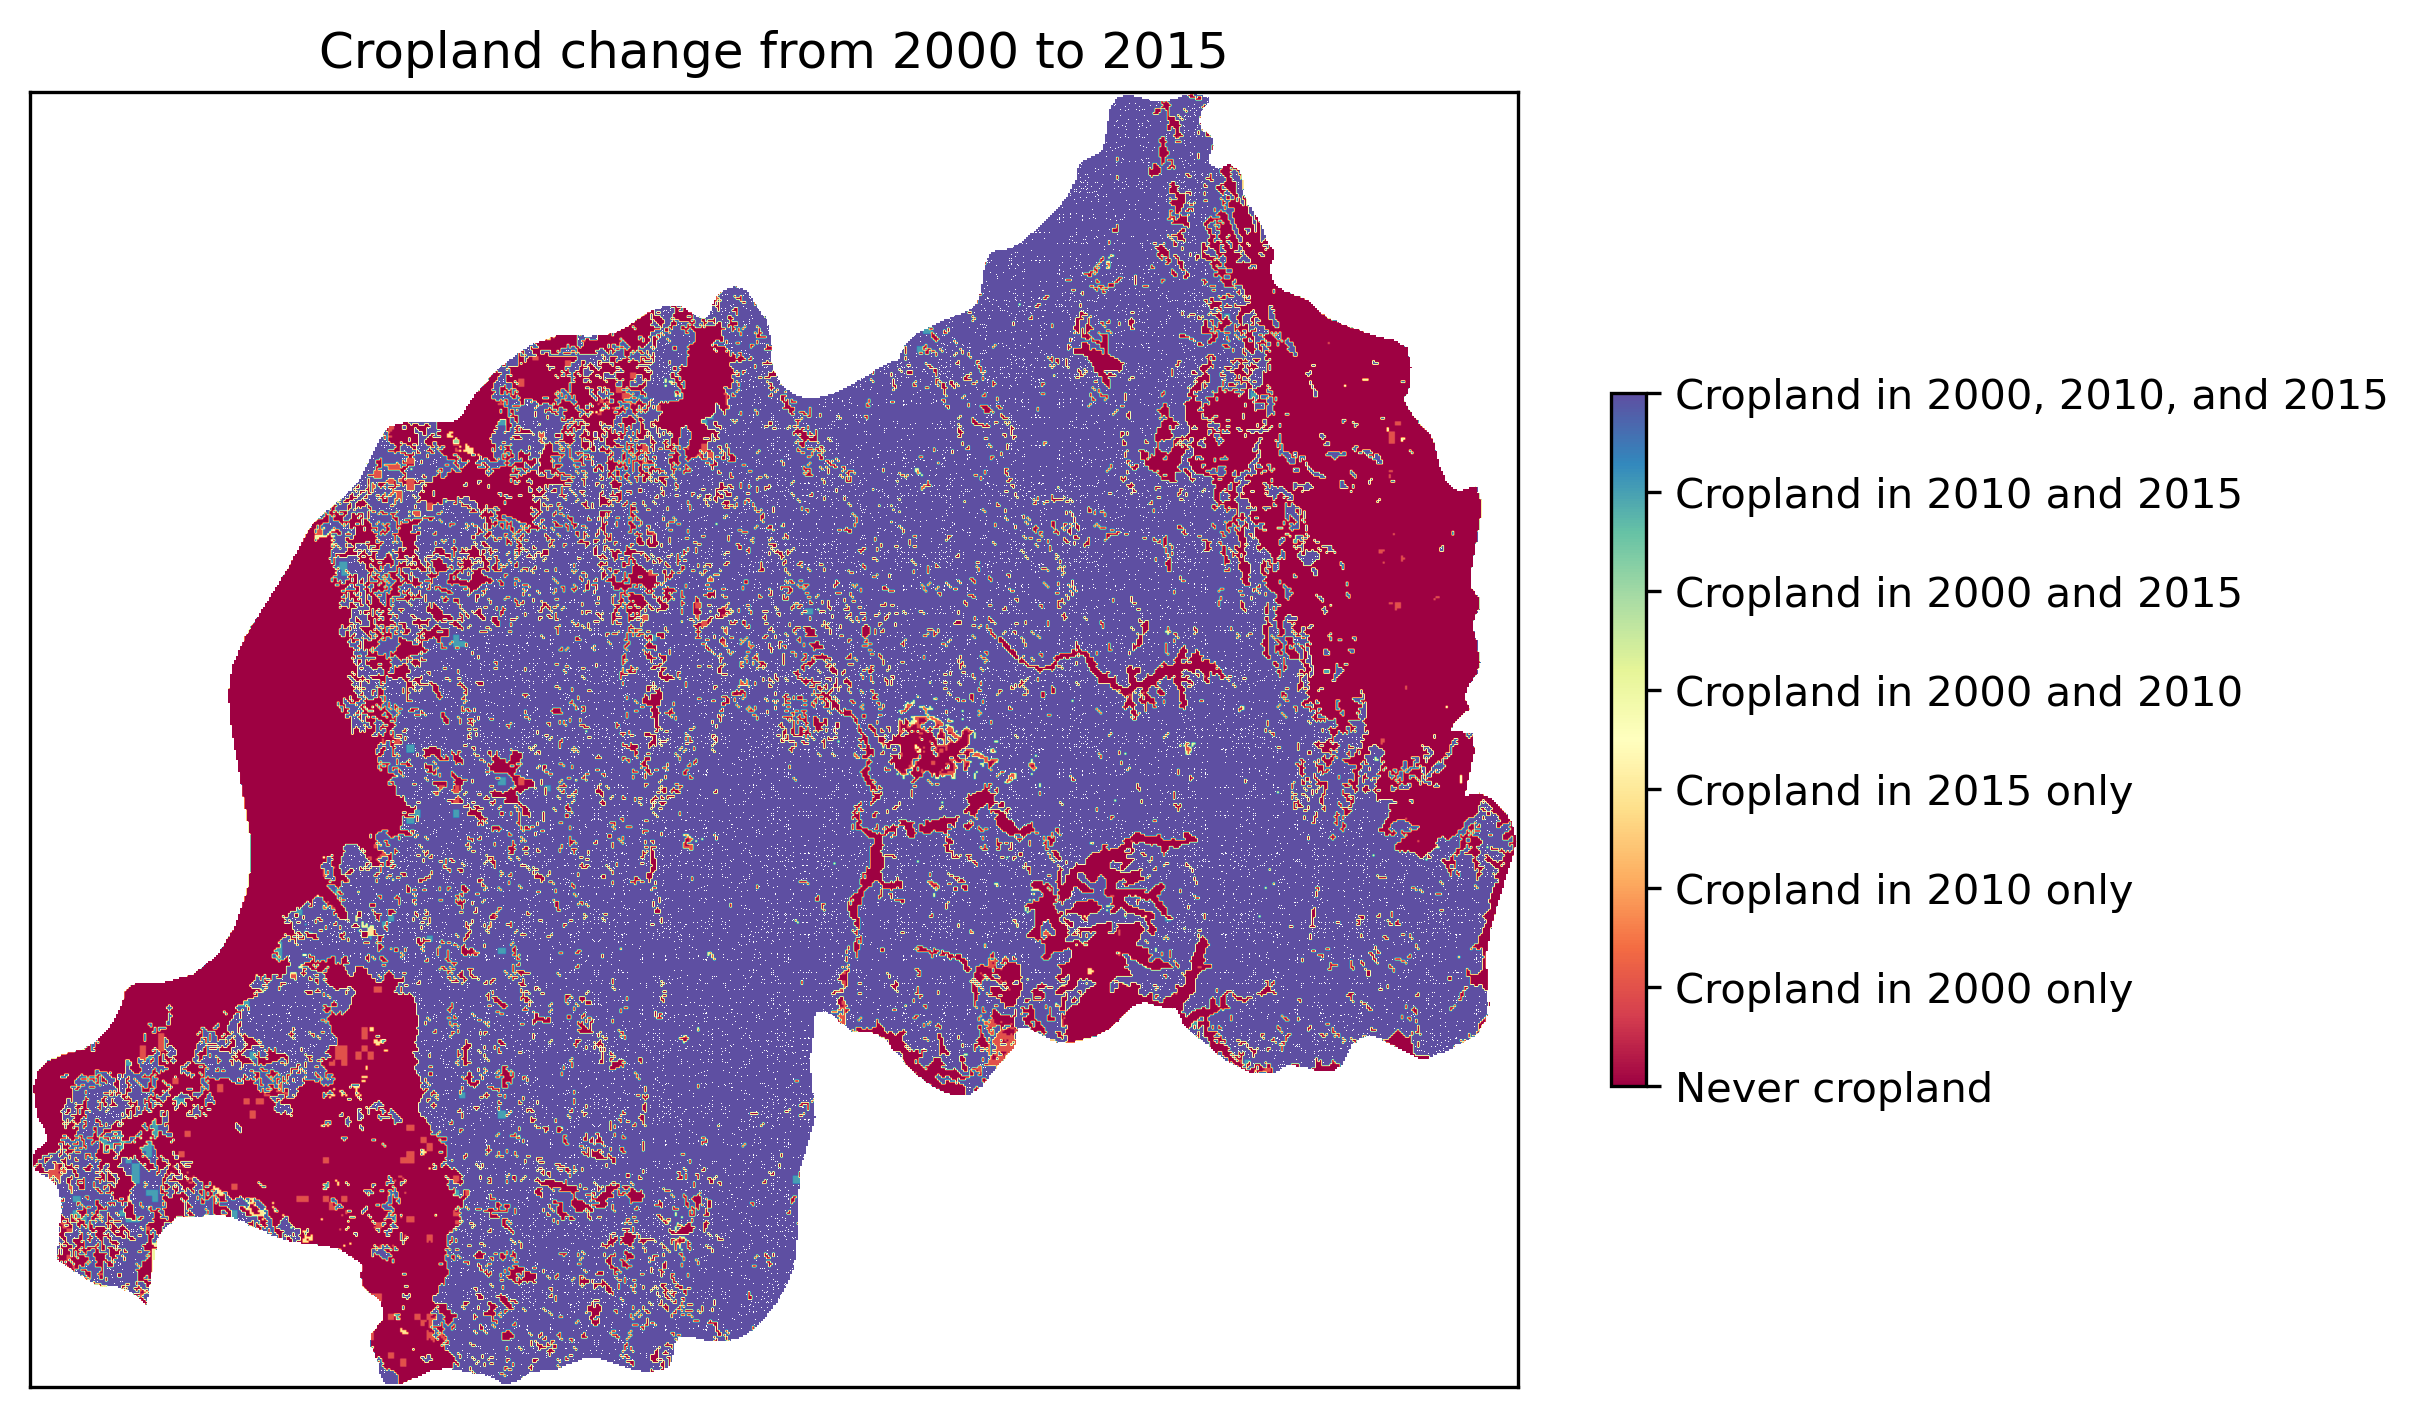

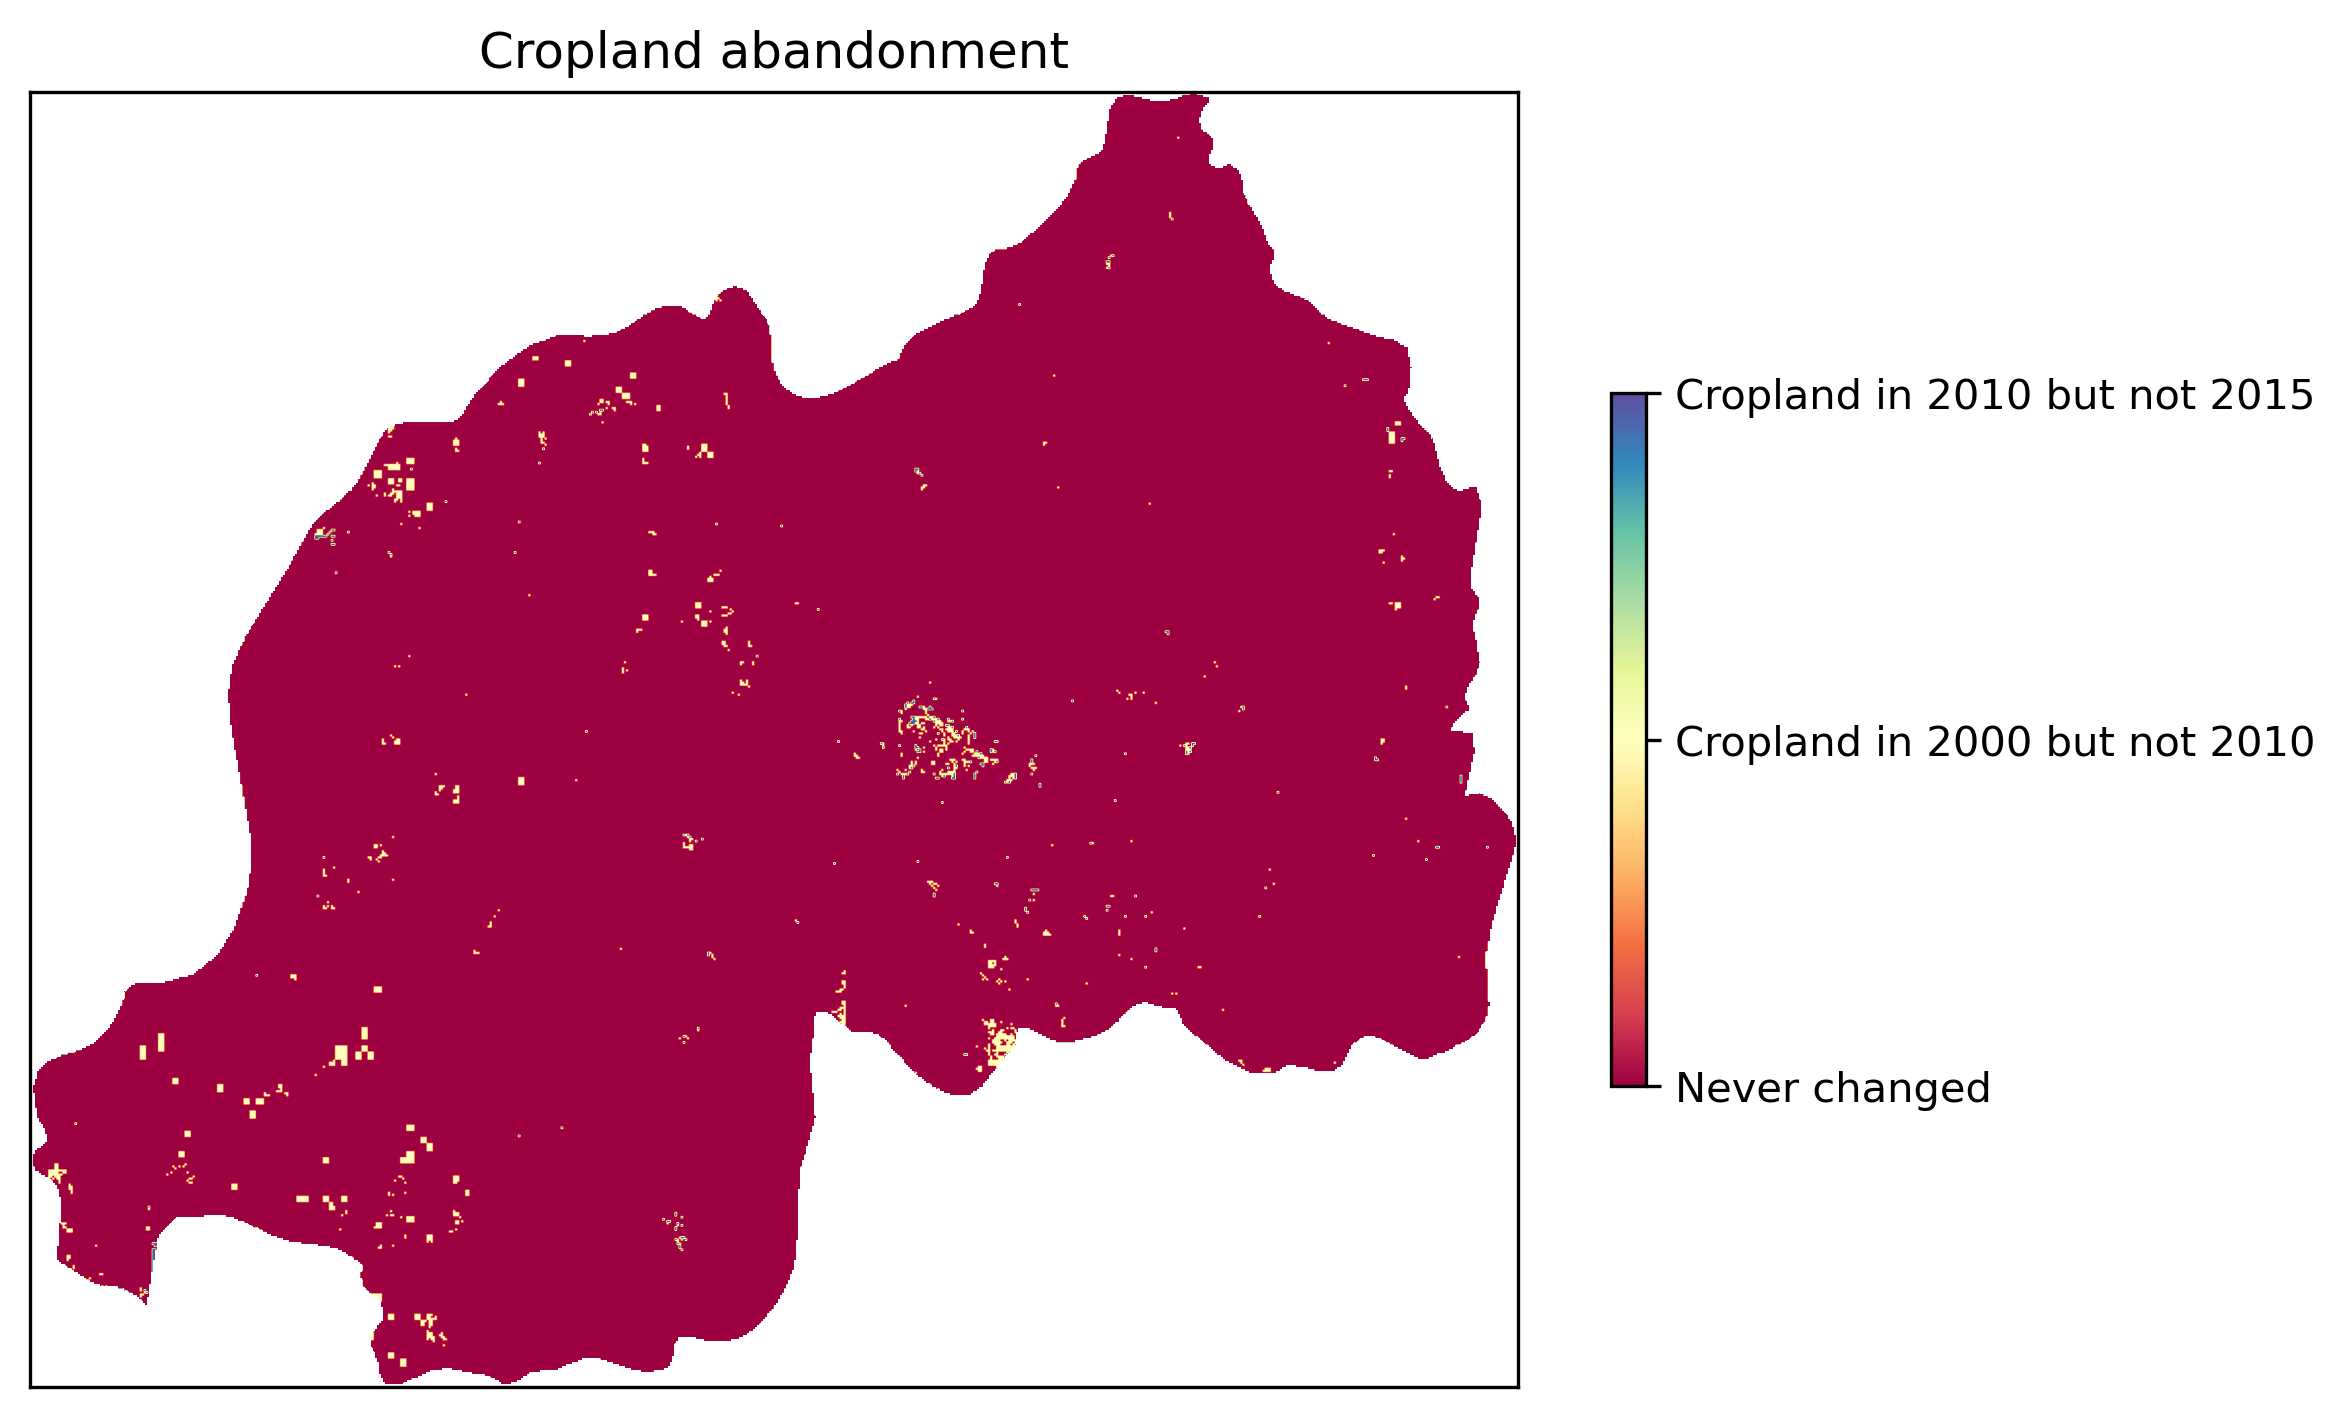

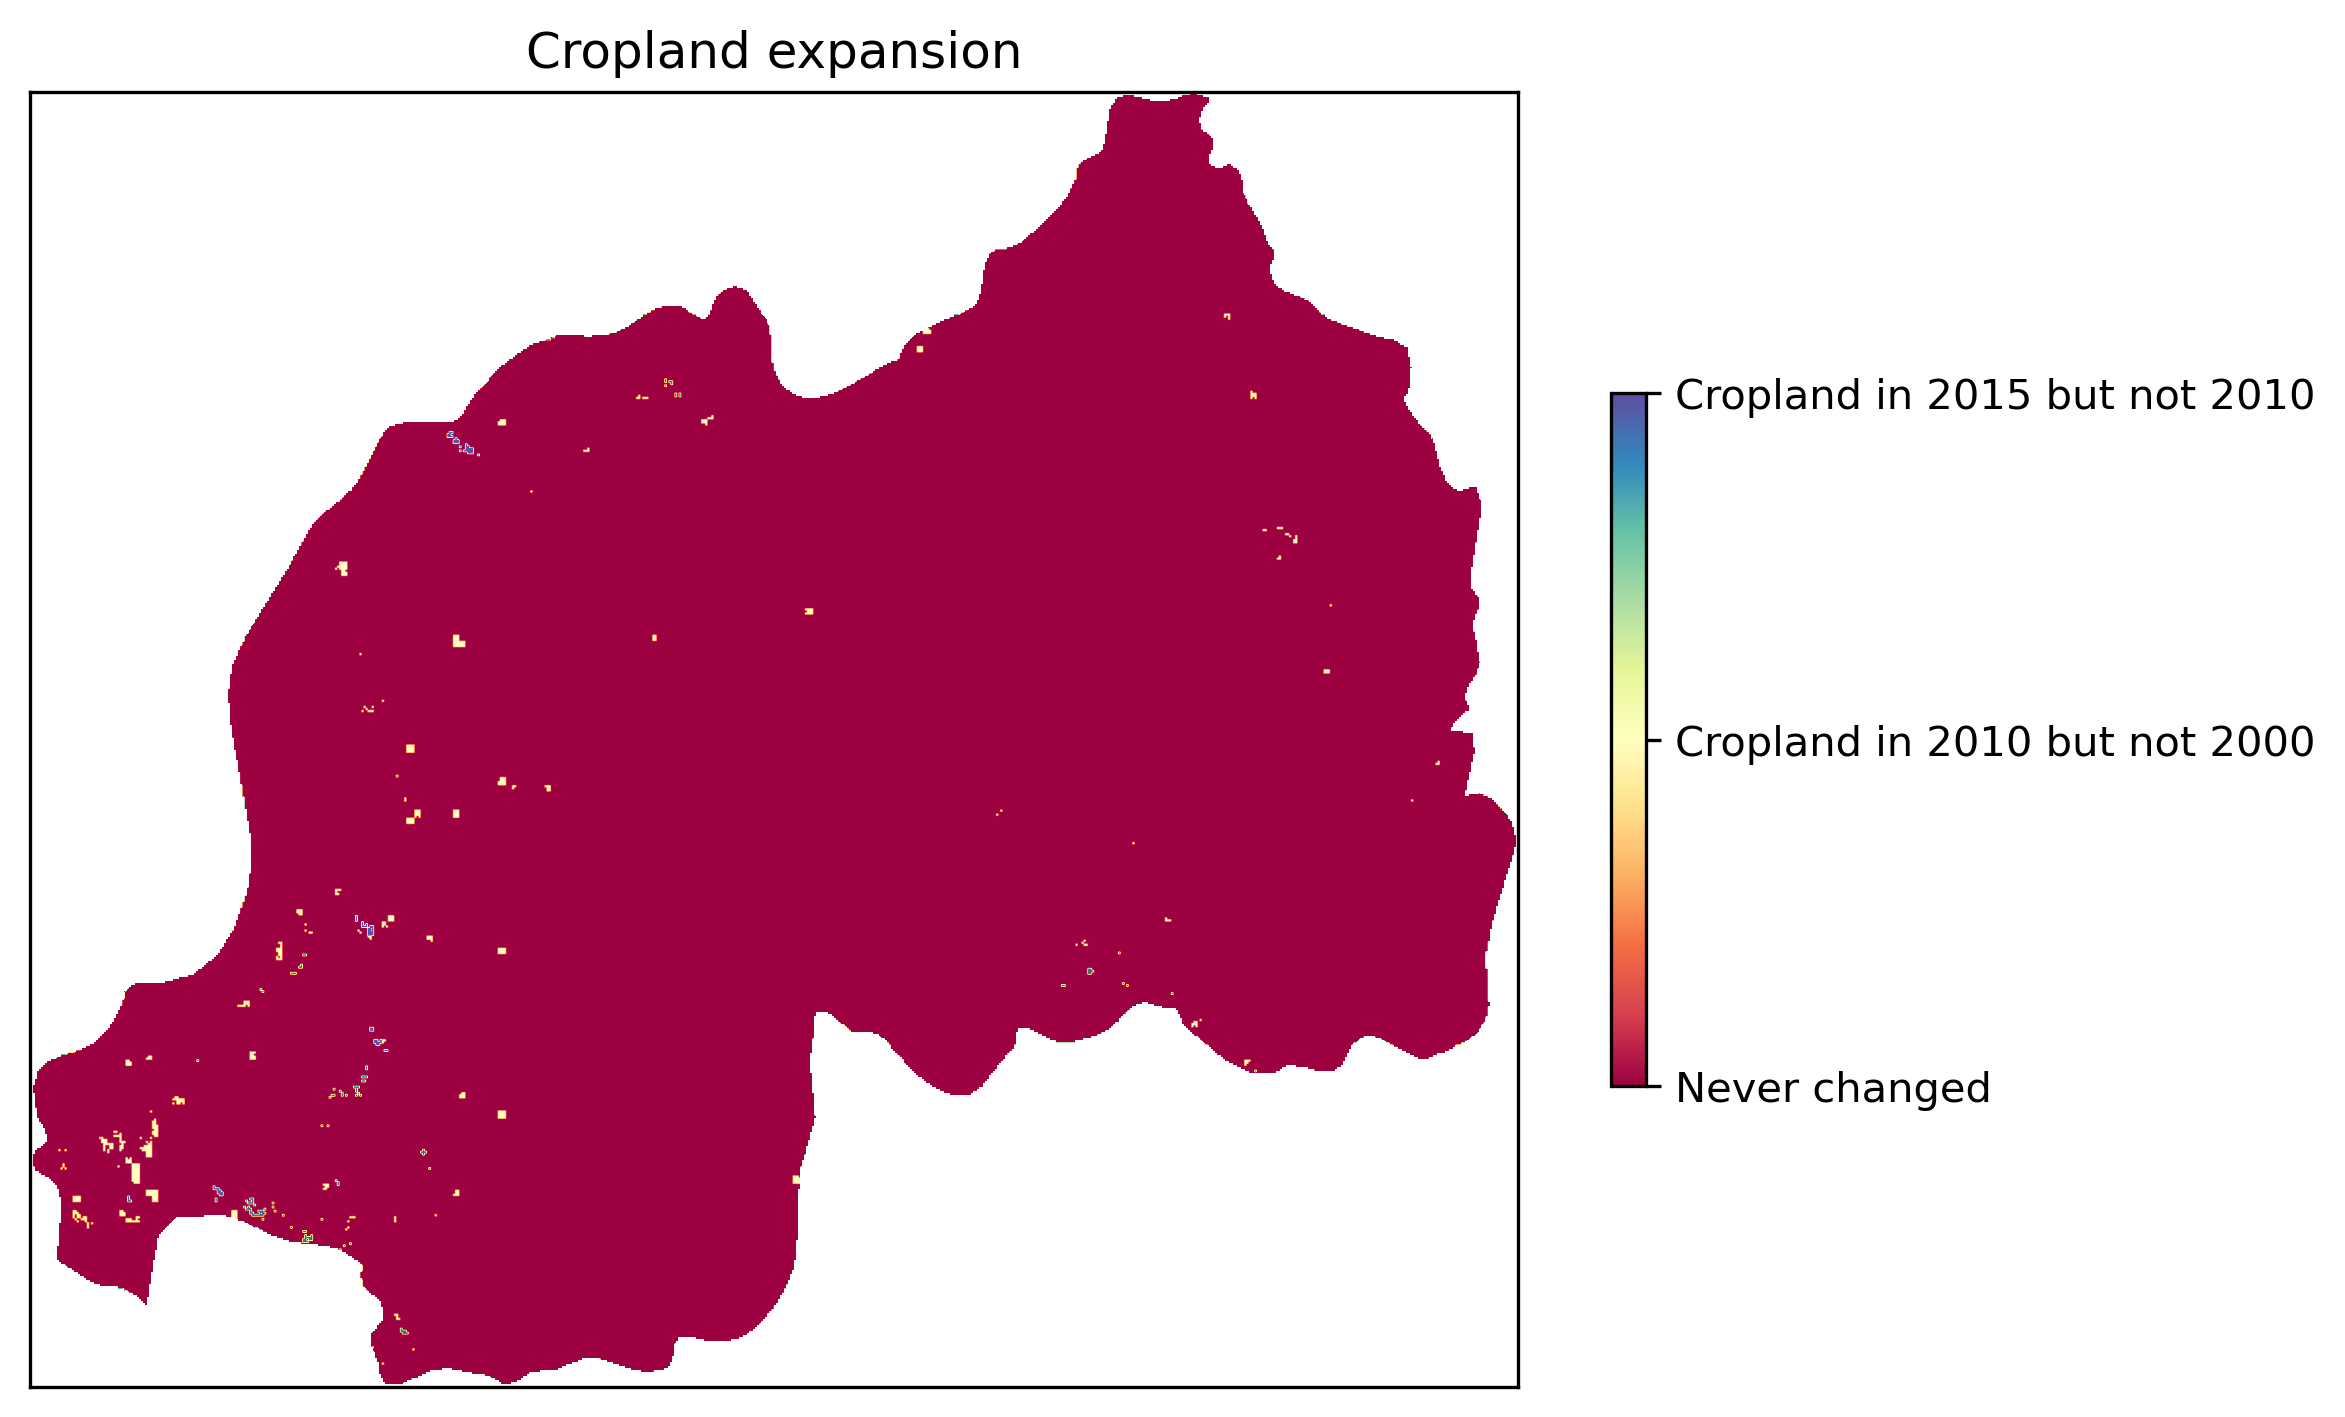

In [12]:
#2F Answer

# Combine the binary rasters to create a new raster based on the specified values

combined_raster = np.where((array_00 == 255), -1, 0)

combined_raster = np.where((cropland_array_00 == 0) & (cropland_array_10 == 0) & (cropland_array_15 ==0), 0, combined_raster)
combined_raster = np.where((cropland_array_00 == 1) & (cropland_array_10 == 0) & (cropland_array_15 ==0), 1, combined_raster)
combined_raster = np.where((cropland_array_00 == 0) & (cropland_array_10 == 1) & (cropland_array_15 ==0), 2, combined_raster)
combined_raster = np.where((cropland_array_00 == 0) & (cropland_array_10 == 0) & (cropland_array_15 ==1), 3, combined_raster)
combined_raster = np.where((cropland_array_00 == 1) & (cropland_array_10 == 1) & (cropland_array_15 ==0), 4, combined_raster)
combined_raster = np.where((cropland_array_00 == 1) & (cropland_array_10 == 0) & (cropland_array_15 ==1), 5, combined_raster)
combined_raster = np.where((cropland_array_00 == 0) & (cropland_array_10 == 1) & (cropland_array_15 ==1), 6, combined_raster)
combined_raster = np.where((cropland_array_00 == 1) & (cropland_array_10 == 1) & (cropland_array_15 ==1), 7, combined_raster)
combined_raster = np.where((combined_raster == -1), 255, combined_raster)

# Plot the combined raster using matplotlib
# Plot the reclassified array using matplotlib
fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Cropland change from 2000 to 2015')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(combined_raster)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 7)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
# Increase the dpi
fig.set_dpi(300)

# Add the colorbar to the figure. It will generate its values from the im object.
# Assuming fig is your Matplotlib figure and im is your image object
colorbar = fig.colorbar(im, orientation='vertical', shrink=0.5)
colorbar.set_ticks(np.arange(8))  # Set the ticks first
colorbar.set_ticklabels([
    'Never cropland',
    'Cropland in 2000 only',
    'Cropland in 2010 only',
    'Cropland in 2015 only',
    'Cropland in 2000 and 2010',
    'Cropland in 2000 and 2015',
    'Cropland in 2010 and 2015',
    'Cropland in 2000, 2010, and 2015'
])

plt.show()

# To get a more clear vision, I draw a second graph on cropland abandonment
combined_raster2 = np.where((array_00 == 255), -1, 0)

combined_raster2 = np.where((cropland_array_00 == 1) & (cropland_array_10 == 0), 1, combined_raster2)
combined_raster2 = np.where((cropland_array_10 == 1) & (cropland_array_15 == 0), 2, combined_raster2)
combined_raster2 = np.where((combined_raster2 == -1), 255, combined_raster2)

# Plot the combined raster using matplotlib
fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Cropland abandonment')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(combined_raster2)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 2)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
# Increase the dpi
fig.set_dpi(300)

# Add the colorbar to the figure. It will generate its values from the im object.
# Assuming fig is your Matplotlib figure and im is your image object
colorbar = fig.colorbar(im, orientation='vertical', shrink=0.5)
colorbar.set_ticks(np.arange(3))  # Set the ticks first
colorbar.set_ticklabels([
    'Never changed',
    'Cropland in 2000 but not 2010',
    'Cropland in 2010 but not 2015',
])

plt.show()

# To get a more clear vision, I draw a second graph on cropland abandonment
combined_raster3 = np.where((array_00 == 255), -1, 0)

combined_raster3 = np.where((cropland_array_00 == 0) & (cropland_array_10 == 1), 1, combined_raster3)
combined_raster3 = np.where((cropland_array_10 == 0) & (cropland_array_15 == 1), 2, combined_raster3)
combined_raster3 = np.where((combined_raster3 == -1), 255, combined_raster3)

# Plot the combined raster using matplotlib
fig = plt.figure(figsize=(8, 6))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Cropland expansion')

# Using the ax we created, we call the imshow function on our array from earlier. This create a new "im" object
im = ax.imshow(combined_raster3)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 2)

# Set the cbar to spectral
im.set_cmap('Spectral')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
# Increase the dpi
fig.set_dpi(300)

# Add the colorbar to the figure. It will generate its values from the im object.
# Assuming fig is your Matplotlib figure and im is your image object
colorbar = fig.colorbar(im, orientation='vertical', shrink=0.5)
colorbar.set_ticks(np.arange(3)) # Set the ticks first
colorbar.set_ticklabels([
    'Never changed',
    'Cropland in 2010 but not 2000',
    'Cropland in 2015 but not 2010',
])

plt.show()

### Part g.

Describe your results. What do you notice about the spatial patterns of cropland expansion and abandonment? What do you think might be driving these patterns? Were they clustered in any specific area? Were the changes the same between 2000-2010 and 2010-2015?

### 2g Answer:
Cropland expansion and abandonment most happen between 2000 and 2010, and we can find land change happen most often in southwest Rwanda. In addition, cropland abandonment takes place more often in central Rwanda, and one probable reason for this could be the establishment of cities. The changes are not same between 2000-2010 and 2010-2015. We can see from the last two graphs that most changes happen between 2000-2010, not 2010-2015.

## Question 2

For this question, you will analyze crops using two datasets:

1. FAOSTAT Production_Crops_E_All_Data_(Normalized).csv. You could download it yourself but please use the one in the Class's Data Directory.
2. MAPSPAM (Spatial Production Allocation Mode). You can find teh download listing here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/PRFF8V Download the readme and all of the files that end with .geotiff.zip. Unzip them and put them in a folder called spam in your Class's Data Directory. This is a big download, so it may take a while. Go watch a show or something. I don't know, what do people do nowadays for fun?3. 

Sidenote: MAPSPAM was a competitor to the EARTHSTAT data we showed in class before. However, MAPSPAM continues to be updated and is more open-source, so I am in the process of switching my whole GTAP-InVEST model to it. 

You will choose 5 crops that interest you, making sure to select crops that are in both MAPSPAM and FAOSTAT dataset. You will want to refer to the ReadMe_v2r0_Global.txt file, which was available at the same download site for MAPSPAM, to identify what each of the different crops mean. For each crop you choose (use a loop), calculate the global sum of production tonnage for irrigated crops, all rainfed crops combined but excluding subsistence crops, and for all crops together. Report those values via print(). 

Next, for the same crops, compare how the value you calculated above compares to the value in the FAOSTAT dataset. To do this, you will need to use Pandas to load the CSV and then figure out how to get just the production tonnage values for the crops you are interested in. Interpret your results for your crops. Is FAO higher/lower than MAPSPAM? Do you notice any patterns to the difference?

1, whea(Wheat)/3, maiz(Maize)/4, barl(Barley)/5, sorg(Sorghum)/ 9, pota(Potatoes)

In [13]:
# Question 2 answer

import os
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

# Here again is the relative path to our data directory
data_directory = '../data/spam' 

# Here are the three new filenames
# Here are the new variable names
variables = ['whea', 'maiz', 'barl', 'sorg', 'pota']
suffix = ['_I', '_H', '_L', '_A']

# Create a list to store the combined variables
variable_all = []

# Loop through each item in 'variables' and 'suffix' and concatenate them
for var in variables:
    for suf in suffix:
        combined_var = var + suf
        variable_all.append(combined_var)

# Create the paths for each variable with "_I", "_H", and "_A"
variable_paths = [os.path.join(data_directory, f'spam2010V2r0_global_A_{var}.tif') for var in variable_all]


print(variable_paths)

# Check that they all exist
for variable_path in variable_paths:
    print(os.path.exists(variable_path))

['../data/spam\\spam2010V2r0_global_A_whea_I.tif', '../data/spam\\spam2010V2r0_global_A_whea_H.tif', '../data/spam\\spam2010V2r0_global_A_whea_L.tif', '../data/spam\\spam2010V2r0_global_A_whea_A.tif', '../data/spam\\spam2010V2r0_global_A_maiz_I.tif', '../data/spam\\spam2010V2r0_global_A_maiz_H.tif', '../data/spam\\spam2010V2r0_global_A_maiz_L.tif', '../data/spam\\spam2010V2r0_global_A_maiz_A.tif', '../data/spam\\spam2010V2r0_global_A_barl_I.tif', '../data/spam\\spam2010V2r0_global_A_barl_H.tif', '../data/spam\\spam2010V2r0_global_A_barl_L.tif', '../data/spam\\spam2010V2r0_global_A_barl_A.tif', '../data/spam\\spam2010V2r0_global_A_sorg_I.tif', '../data/spam\\spam2010V2r0_global_A_sorg_H.tif', '../data/spam\\spam2010V2r0_global_A_sorg_L.tif', '../data/spam\\spam2010V2r0_global_A_sorg_A.tif', '../data/spam\\spam2010V2r0_global_A_pota_I.tif', '../data/spam\\spam2010V2r0_global_A_pota_H.tif', '../data/spam\\spam2010V2r0_global_A_pota_L.tif', '../data/spam\\spam2010V2r0_global_A_pota_A.tif']

In [14]:
def load_array(input_raster_path):
    """Load a raster into a numpy array"""
    if not os.path.exists(input_raster_path):
        print('The file does not exist')
        return None
    
    raster = gdal.Open(input_raster_path)
    band = raster.GetRasterBand(1)
    array = band.ReadAsArray()
    return array 

# Load arrays for each variable
variable_prods = [load_array(path) for path in variable_paths]

# Calculate TA, TI, and TB
TI_prods = variable_prods[::4]
TH_prods = variable_prods[1::4]
TL_prods = variable_prods[2::4]
TA_prods = variable_prods[3::4]
THL_prods = [TH + TL for TH, TL in zip(TH_prods, TL_prods)]

# Print out the total production for TA, TI, and TB
for var, TA, TI, THL, TH, TL in zip(variables, TA_prods, TI_prods, THL_prods, TH_prods, TL_prods):
    print(f'Total {var} production globally is:')
    print(f'Complete crop is: {np.nansum(TA)} tons')
    print(f'Irrigated portion of crop is: {np.nansum(TI)} tons')
    print(f'Rainfed high & low inputs portion of crop: {np.nansum(THL)} tons (high: {np.nansum(TH)}, low: {np.nansum(TL)})')



Total whea production globally is:
Complete crop is: 190999360.0 tons
Irrigated portion of crop is: 37929536.0 tons
Rainfed high & low inputs portion of crop: 124044320.0 tons (high: 94263296.0, low: 29781032.0)
Total maiz production globally is:
Complete crop is: 142845888.0 tons
Irrigated portion of crop is: 16657668.0 tons
Rainfed high & low inputs portion of crop: 85404112.0 tons (high: 67425328.0, low: 17978876.0)
Total barl production globally is:
Complete crop is: 40739928.0 tons
Irrigated portion of crop is: -4331596.0 tons
Rainfed high & low inputs portion of crop: 25141706.0 tons (high: 25201032.0, low: -59311.0)
Total sorg production globally is:
Complete crop is: 30762564.0 tons
Irrigated portion of crop is: -6071223.0 tons
Rainfed high & low inputs portion of crop: 6880564.0 tons (high: 465969.5, low: 6414598.0)
Total pota production globally is:
Complete crop is: 10109698.0 tons
Irrigated portion of crop is: -5434116.0 tons
Rainfed high & low inputs portion of crop: -3758

In [15]:
# Check with FAO data

import pandas as pd

# 1. Import the CSV file to create a DataFrame
data_directory = '../data' 
file_path = 'Production_Crops_E_All_Data_(Normalized).csv'

# Create the paths (by joining with your base data directory)
fao_path = os.path.join(data_directory, file_path)

# Import and filter data
df = pd.read_csv(fao_path, encoding='latin1')

df = df[(df['Area Code'] < 5000) & (df['Element'] == 'Production') & (df['Year'] == 2010)]

df.to_excel('filtered_data.xlsx', index=False)

# 2. Keep only Item = "Crop"
filtered_df_w = df[(df['Item'] == 'Wheat')]
filtered_df_m = df[(df['Item'] == 'Maize')]
filtered_df_b = df[(df['Item'] == 'Barley')]
filtered_df_s = df[(df['Item'] == 'Sorghum')]
filtered_df_p = df[(df['Item'] == 'Potatoes')]

filtered_df_w.to_excel('filtered_data.xlsx', index=False)


# 3. Calculate the sum of "Value" throughout all the countries in the world
total_production_w = filtered_df_w['Value'].sum()
total_production_m = filtered_df_m['Value'].sum()
total_production_b = filtered_df_b['Value'].sum()
total_production_s = filtered_df_s['Value'].sum()
total_production_p = filtered_df_p['Value'].sum()

print(f"The total wheat production in the world in 2010 is: {total_production_w} tons")
print(f"The total maize production in the world in 2010 is: {total_production_m} tons")
print(f"The total barley production in the world in 2010 is: {total_production_b} tons")
print(f"The total sorghum production in the world in 2010 is: {total_production_s} tons")
print(f"The total potatoes production in the world in 2010 is: {total_production_p} tons")



The total wheat production in the world in 2010 is: 755988842.0 tons
The total maize production in the world in 2010 is: 1029220307.0 tons
The total barley production in the world in 2010 is: 125289284.0 tons
The total sorghum production in the world in 2010 is: 62641793.0 tons
The total potatoes production in the world in 2010 is: 405209100.0 tons


Comment on the result:

The two results do not match. Possible reason is how I deal with map data, considering that I have outputed excel file for FAO data and confirm the calculation is correct.